# Introductory Numerical Methods for Simulating Dynamic Systems
This notebook comprises the exercises we will use for this lecture. If you are not familiar with Python, consider using the Julia exercises instead which include a `basics.ipynb` file to get you up to speed.

## Preliminary Code
The cell below defines helper functions to assist with the exercises. Please run this cell be before proceeding below to the exercises.

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def plot_solution(ts, *ys, labels = (), marker_size = 3):
    if len(labels) == 0:
        labels = ("y" + str(i) + "(t)" for i in range(1, len(ys)+1))
    f = plt.figure()
    plt.plot(ts, ys[0], marker = 'o', markersize = marker_size, label = labels[0])
    plt.xlabel("time (t)")
    for i in range(1, len(ys)):
        plt.plot(ts, ys[i], marker = 'o', markersize = marker_size, label = labels[i])
    plt.legend(loc='best')
    # return f

## Exercise 1: Simple ODE Simulation via Explicit Euler
Solve the following ODE:
$$\begin{gathered}
\frac{d y(t)}{dt} = e^{-t} \\
y(0) = -1
\end{gathered}$$
for $t \in [0, 1]$ using $\Delta t=0.1$. Plot your result against the analytical solution (you also need to determine this).

Recall that the update rule for explicit Euler is:
$$\tilde{y}(t_{k+1}) = \tilde{y}(t_k) + f(y(t_k), t_k) \Delta t$$

### Plot the Analytical Solution
First, let's determine the analytical solution and plot it.

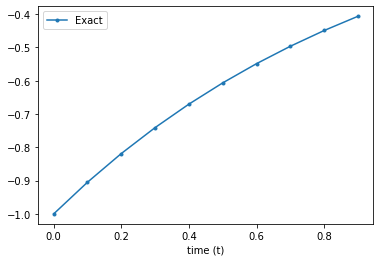

In [10]:
# Define parameters
dt = 0.1
ts = np.arange(0, 1, dt)

# Evaluate the analytical function for each t in ts
ys = -np.exp(-ts)

# Plot the result
plot_solution(ts, ys, labels = ("Exact",))

### Compute the Approximate Solution using Explicit Euler
Now that let's compute the approximate solution using Euler's method. 

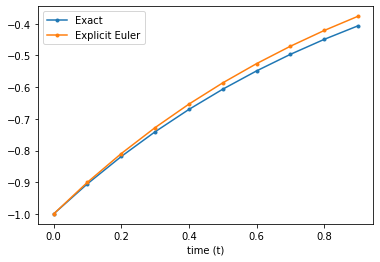

In [11]:
# Define parameters
y0 = -1
dt = 0.1 # TODO try changing this
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1

# Define storage vector for y(t)
y_euler = np.zeros(len(ts))

# Fill in y_euler using explicit Euler
y_euler[0] = y0
for k in range(num_steps):
    y_euler[k + 1] = y_euler[k] + np.exp(-ts[k]) * dt

# Plot the results
plot_solution(ts, ys, y_euler, labels = ("Exact", "Explicit Euler"))

## Exercise 2: Simulate Coupled ODEs
Simulate the following system of ODEs:
$$\begin{gathered}
\frac{d x(t)}{dt} = -5x(t) + 5y(t) \\
\frac{d y(t)}{dt} = 14x(t) - 2y(t) \\
x(0)=y(0)=1 
\end{gathered}$$
for $t \in [0, 1]$ with $\Delta t = 0.1$. 

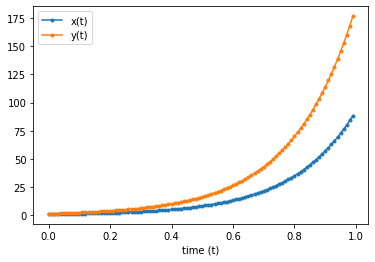

In [12]:
# Define parameters
x0 = 1
y0 = 1
dt = 0.01
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1

# Define storage vectors for x(t) and y(t)
x_euler = np.zeros(len(ts))
y_euler = np.zeros(len(ts))

# Approximate x(t) and y(t) using explicit euler and fill in the storage vectors
x_euler[0] = x0
y_euler[0] = y0
for k in range(num_steps):
    x_euler[k+1] = x_euler[k] + (-5 * x_euler[k] + 5 * y_euler[k]) * dt
    y_euler[k+1] = y_euler[k] + (14 * x_euler[k] - 2 * y_euler[k]) * dt

# Plot the results
plot_solution(ts, x_euler, y_euler, labels = ("x(t)", "y(t)"))

### Exercise 3: Stability of Explicit Euler
Simulate the following:
$$\begin{gathered}
\frac{d y(t)}{dt} = -20y(t) \\
y(0) = 1
\end{gathered}$$
for $t \in [0, 1]$ with $\Delta t = 0.1$. Let's compare with the analytical solution as well.

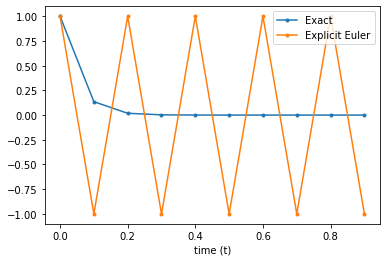

In [13]:
# Define parameters
y0 = 1
dt = 0.1
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1

# Define storage vectors for y(t)
y_euler = np.zeros(len(ts))

# Define the analytical solution of y(t) for each t in ts
ys = np.exp(-20 * ts)

# Do explicit euler and fill y_euler
y_euler[0] = y0
for k in range(num_steps):
    y_euler[k + 1] = y_euler[k] + -20 * y_euler[k] * dt

# Plot the solution 
plot_solution(ts, ys, y_euler, labels = ("Exact", "Explicit Euler"))

### Exercise 4: Stability with Implicit Euler
Redo Exercise 3 using implicit Euler.

Here we will need to solve a nonlinear equation. For a general equation $g(y) = 0$ this can be accomplished in python via the syntax:
```python
# Define residual function that populates a vector (the resdiuals of each equation) and uses variables y 
def residual(y):
    return [y[0]^2] # let g(y) = y^2
end
y_opt = fsolve(residual, [0.0])[0] # here [0.0] is the initial guess
```

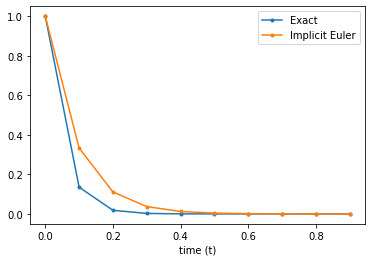

In [15]:
# Define parameters
y0 = 1
dt = 0.1
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1

# Define storage vectors for y(t)
y_euler = np.zeros(len(ts))

# Define the analytic solution for each t in ts
ys = np.exp(-20 * ts)

# Do explicit euler and fill y_euler
y_euler[0] = y0
for k in range(num_steps):
    def residual(y):
        return [y_euler[k] + -20 * y[0] * dt - y[0]]
    y_euler[k + 1] = fsolve(residual, [y_euler[k]])[0]

# Plot the solution 
plot_solution(ts, ys, y_euler, labels = ("Exact", "Implicit Euler"))

## Exercise 5: Simulate a System of ODEs using Implicit Euler
Repeat Exercise 4, but now use implicit Euler.

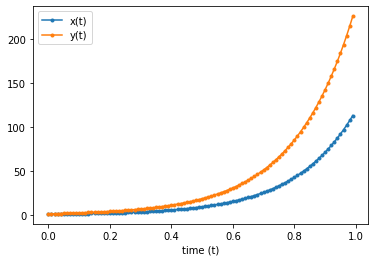

In [16]:
# Define parameters
x0 = 1
y0 = 1
dt = 0.01
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1

# Define storage vectors for x(t) and y(t)
x_euler = np.zeros(len(ts))
y_euler = np.zeros(len(ts))

# Approximate x(t) and y(t) using explicit euler and fill in the storage vectors
x_euler[0] = x0
y_euler[0] = y0
for k in range(num_steps):
    def residual(y):
        return [x_euler[k] + (-5 * y[0] + 5 * y[1]) * dt - y[0],
                y_euler[k] + (14 * y[0] - 2 * y[1]) * dt - y[1]]
    x_euler[k + 1], y_euler[k + 1] = fsolve(residual, [x_euler[k], y_euler[k]])

# Plot the results
plot_solution(ts, x_euler, y_euler, labels = ("x(t)", "y(t)"))

## Exercise 6: Simulate Reaction Network in Batch Reactor
Simulate the response of the reaction system:
$$\begin{gathered}
\text{A} \rightleftharpoons \text{B} \\
\text{A} \rightleftharpoons \text{C}
\end{gathered}$$
for $t \in [0, 1]$ using implicit Euler. The ODEs are given by:
$$\begin{aligned}
&\frac{d \textbf{c}(t)}{dt} = \gamma \textbf{r}(\textbf{c}, t) \\
&\textbf{c}(0) = c_{i, 0}
\end{aligned}$$
where we have:
$$\textbf{r}(\textbf{c}, t) = \textbf{k}^T(t)\textbf{c}(t)$$
and we have:
$$k_{ij}(t) = A_{ij} \exp\Bigg(\frac{-E_{a,ij}}{RT(t)}\Bigg)$$
The needed parameters are given below.

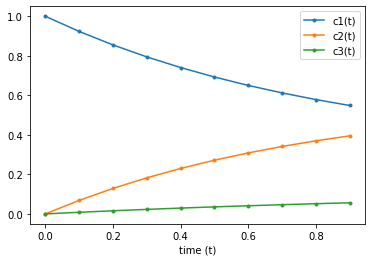

In [21]:
# Define the parameters
R = 1.987
A = np.array([[3.6362e6, 190.6879], [-2.5212e16, 0], [0, -8.7409e24]])
Ea = np.array([[10000., 5000.], [25000., 0], [0., 40000.]])
gamma = np.array([[-1, -1], [1, 0], [0, 1]])
c0 = np.array([1., 0., 0.])
dt = 0.1 # TODO put value here
ts = np.arange(0, 1, dt)
num_steps = len(ts) - 1
Ts = np.ones(len(ts)) * 325.
Ts[Ts < 0.5] = 333

# Define collection array c_euler
c_euler = np.zeros((len(ts), 3)) # time by cs

# Implement explicit Euler and fill c
c_euler[0, :] = c0
for k in range(num_steps):
    ks = A * np.exp(-Ea / R / Ts[k])
    rate = np.dot(ks.T, c_euler[k, :]) # β is always 1 and is unnecessary
    c_euler[k + 1, :] = c_euler[k, :] + np.dot(gamma, rate) * dt

#  Plot the solution
plot_solution(ts, c_euler[:, 0], c_euler[:, 1], c_euler[:, 2], labels = ("c1(t)", "c2(t)", "c3(t)"))